# Exploración de archivos

In [1]:
from utils.cargar import df_caso

In [2]:
df = df_caso('julieta')
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time
id,,,,,,,,,,,,
11511,2695,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Si estudiaste y sabes hacer los ejercicios ¿pa...,1,2021-05-19T02:23:09.528Z
11515,2702,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,5,No debería usar la información ya que no es co...,1,2021-05-19T02:49:39.214Z
11516,2701,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,4,si es que no sabe realizar la pregunta puede r...,1,2021-05-19T02:49:40.029Z
11517,2700,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,3,lamentablemente este pais es muy injusto y la ...,1,2021-05-19T02:53:11.462Z
11519,2707,NaN,M,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Considerando que Julieta pudo optar por una be...,1,2021-05-19T03:16:45.404Z


In [3]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

[Proporcione argumentos para justificar su respuesta]. En el último control realizado Julieta se ve en la posibilidad de copiar una respuesta que fue compartida en el grupo de WhatsApp de su sección. Julieta en esta situación a la que se ve enfrentada en el control debiera:
1	Usar la información del grupo de WhatsApp
6	No usar la información del grupo de WhatsApp


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('Cantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      4339
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment        34
phase           0
time            0
dtype: int64

Cantidad de valores únicos por columna:


user_id       819
team_id       247
gender          3
df              1
title          21
opt_left        2
opt_right       2
max_num         2
sel             7
comment      5004
phase           6
time         5095
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 5061


## Exploración básica del texto

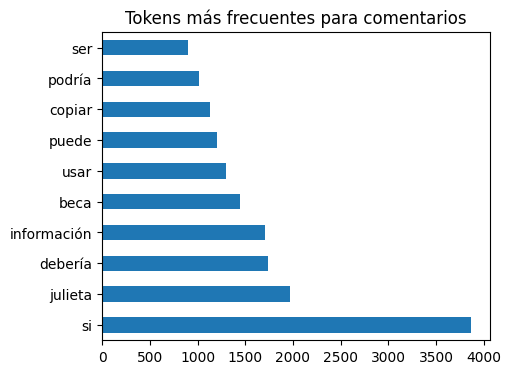

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

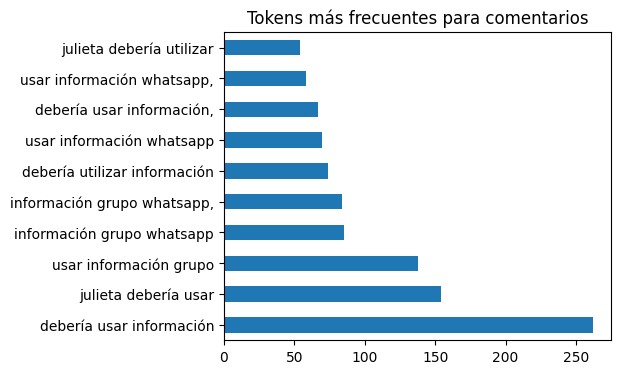

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

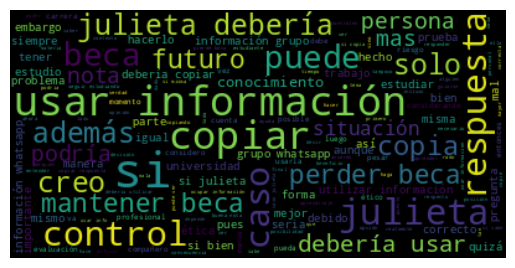

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))

## Análisis exploratorio

---

In [9]:
from utils.preprocesamiento import delete_non_string_rows

df = delete_non_string_rows(df,'comment')

0 rows found with non string elements for column comment


In [10]:
from utils.exploracion import comment_length

lengths = comment_length(df,'comment')
lengths_nsw = comment_length(df,'comment',ignore=stopwords.words('spanish'))

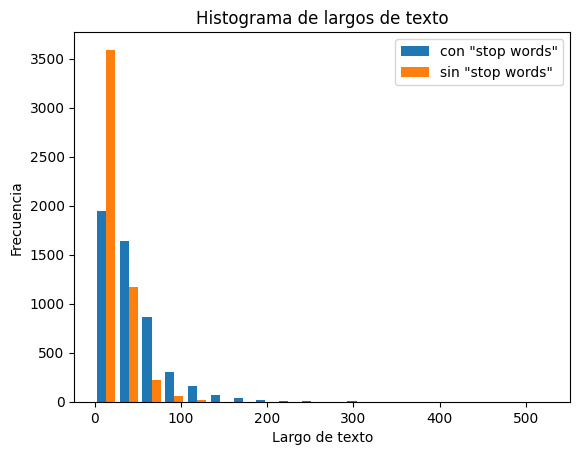

In [11]:
import matplotlib.pyplot as plt

plt.hist([lengths, lengths_nsw], bins=20, color=['tab:blue', 'tab:orange'], label=['con "stop words"', 'sin "stop words"'])

plt.xlabel('Largo de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de largos de texto')
plt.legend()
plt.show()

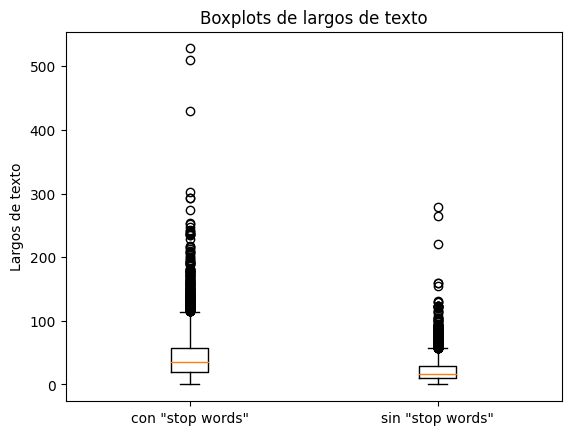

In [12]:
fig, ax = plt.subplots()
ax.boxplot([lengths, lengths_nsw])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['con "stop words"', 'sin "stop words"'])
ax.set_title('Boxplots de largos de texto')
plt.show()

In [15]:
import numpy as np

def print_basic_stats(arr):
    print("Mínimo:", np.min(arr))
    print("Máximo:", np.max(arr))
    print("Media:", np.mean(arr))
    print("Mediana:", np.median(arr))
    print("Mode:", np.argmax(np.bincount(arr)))
    print("Desviación estándar:", np.std(arr))

In [16]:
print('Con "stop words"')
print_basic_stats(lengths)
print('\nSin "stop words"')
print_basic_stats(lengths_nsw)

Con "stop words"
Mínimo: 1
Máximo: 528
Media: 43.65283540802213
Mediana: 35.0
Mode: 20
Desviación estándar: 36.52828433655485

Sin "stop words"
Mínimo: 0
Máximo: 279
Media: 22.07705986959099
Mediana: 17.0
Mode: 11
Desviación estándar: 18.34507507803722
